In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
data = pd.read_csv("heart.csv")

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data.shape

(1025, 14)

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [14]:
x = data.drop(columns = 'target', axis =1)
y = data['target']

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


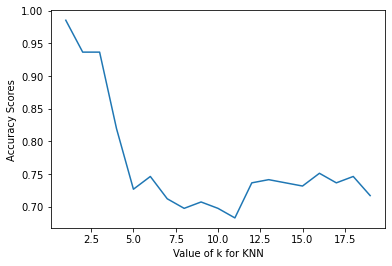

In [23]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Scores')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
acc = metrics.accuracy_score(Y_test,y_pred)*100
print ("Accuracy of our KNN model is {}".format(acc))

Accuracy of our KNN model is 93.65853658536587


In [27]:
from sklearn.metrics import confusion_matrix as cm

<AxesSubplot:>

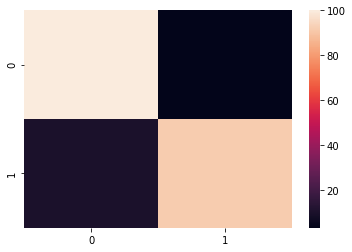

In [28]:
conf = cm(Y_test, y_pred)
sns.heatmap(conf)

# Age relation to heart Disease

<Figure size 1080x576 with 0 Axes>

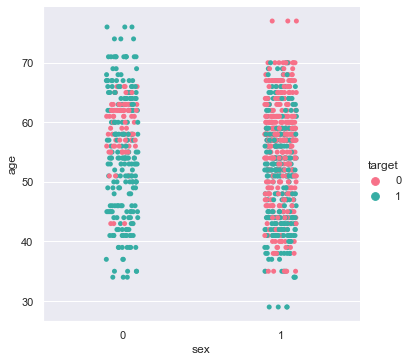

In [60]:
plt.figure(figsize = (15,8))
sns.catplot(data = data, x ='sex', y = 'age', hue = 'target', palette = 'husl')
plt.show()

# Comparing Colestrol level and heart disease


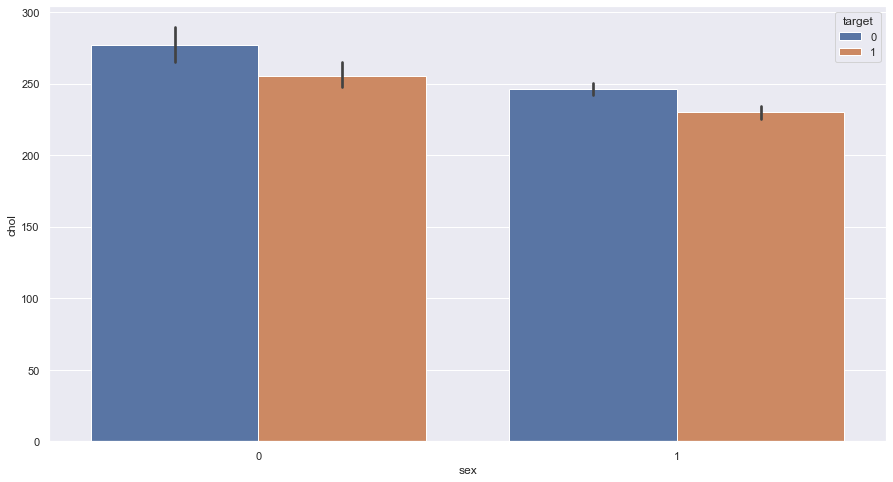

In [53]:
plt.figure(figsize = (15,8))
sns.barplot(data=data, x='sex', y= 'chol', hue = 'target')
plt.show()

# CA (Major Vessel) and heart disease

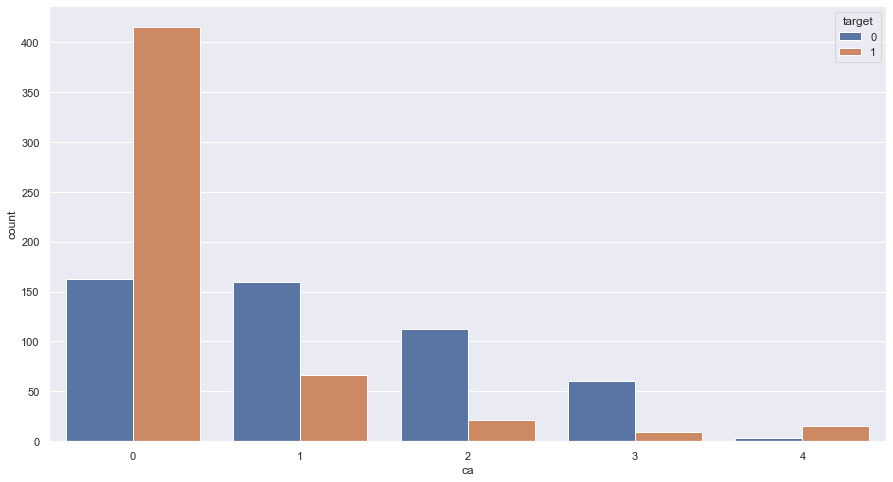

In [56]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'ca', hue = 'target', data =data)
plt.show()

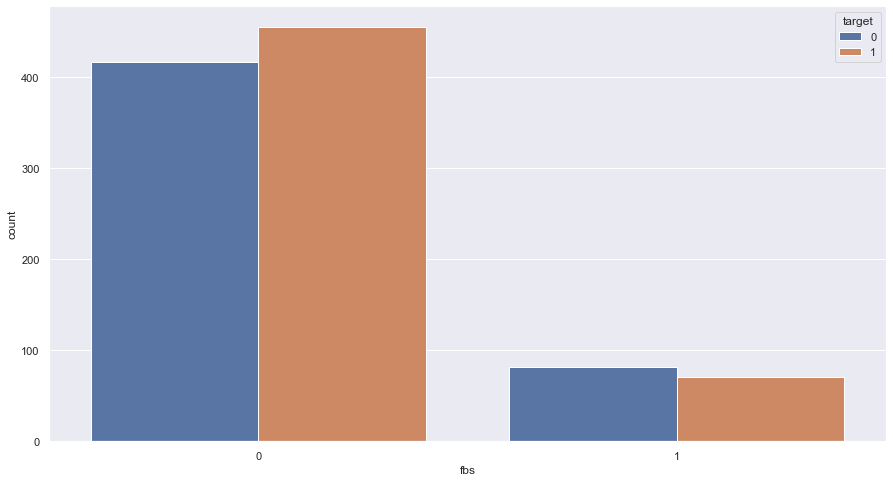

In [58]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'fbs', hue = 'target', data =data)
plt.show()

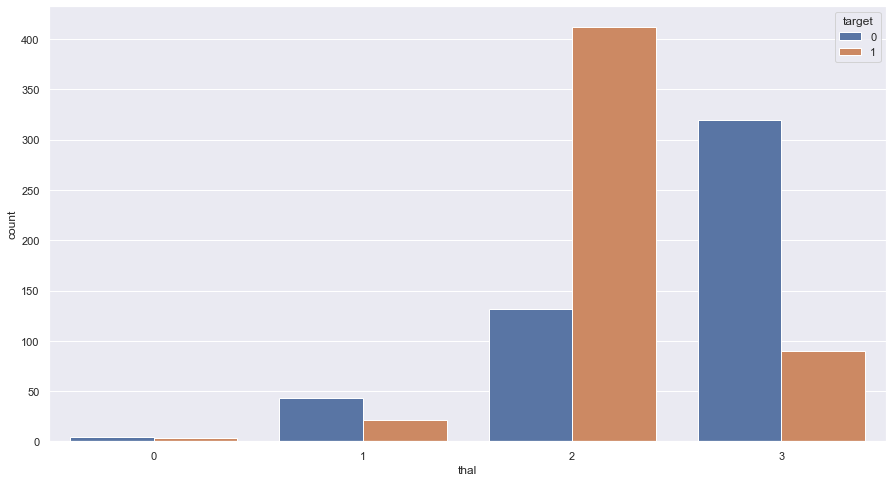

In [61]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'thal', hue = 'target', data =data)
plt.show()

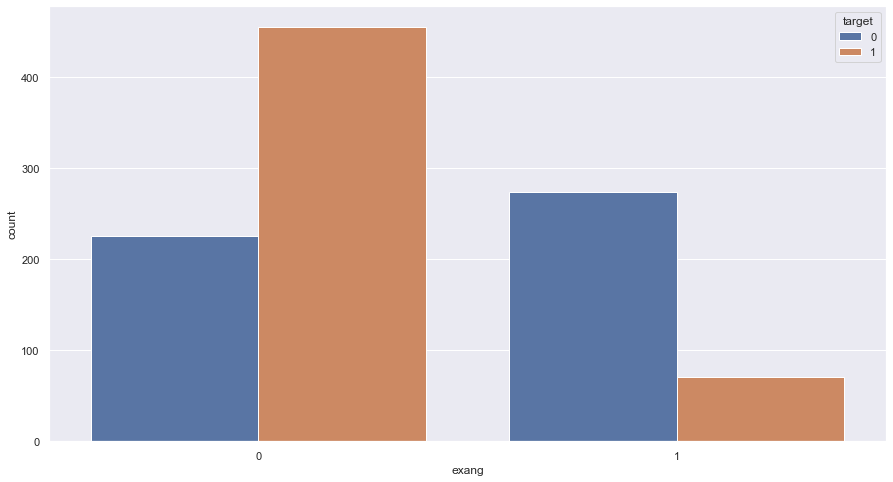

In [62]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'exang', hue = 'target', data =data)
plt.show()


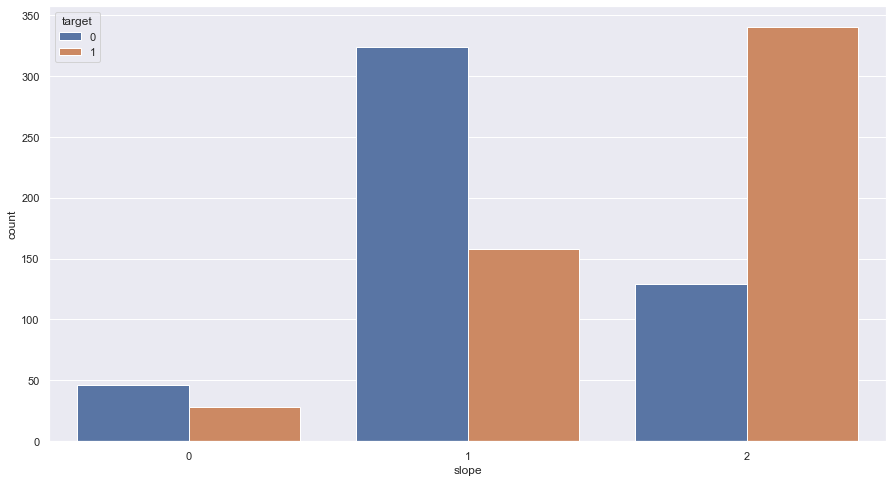

In [63]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'slope', hue = 'target', data =data)
plt.show()



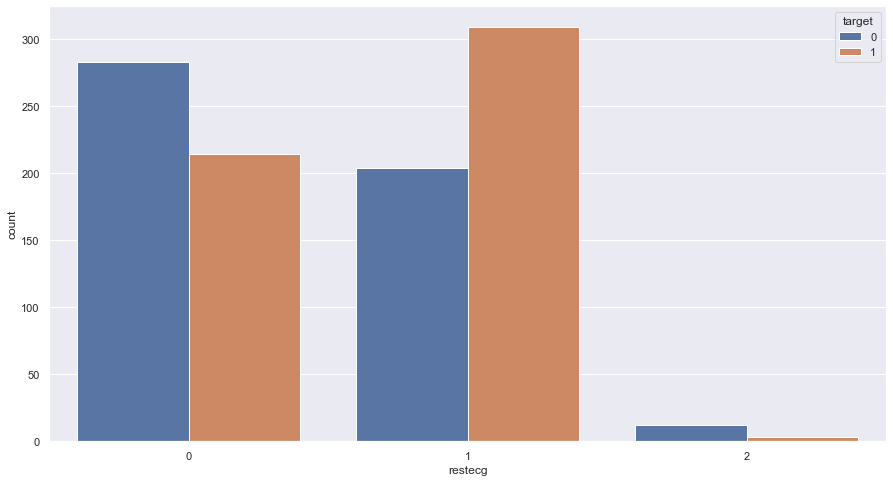

In [73]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'restecg', hue = 'target', data =data)
plt.show()


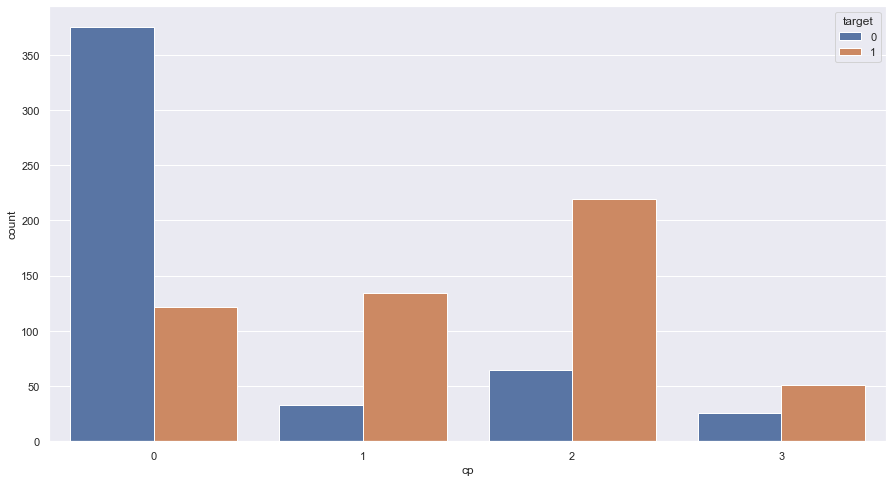

In [76]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'cp', hue = 'target', data =data)
plt.show()
